# **MAS473 Programming Recitation (Week 14)**

## **Contents**

We will cover

- **Pytorch Basics**
- **Fully Connected Neural Network**
- **Convolutional Neural Network**

## **1. Pytorch Basics**


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'1.10.0+cu111'

### **(1) Tensor**

In [ ]:
x = torch.Tensor([[1, 2], [3, 4]])

In [ ]:
x # float

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
y = torch.Tensor([[2, 3], [-1, 2]])

Addition

In [ ]:
print(x+y)
print(torch.add(x, y))
print(x.add(y))

tensor([[3., 5.],
        [2., 6.]])
tensor([[3., 5.],
        [2., 6.]])
tensor([[3., 5.],
        [2., 6.]])


Broadcasting

In [ ]:
w = torch.Tensor([[1, 2]])
x + w

tensor([[2., 4.],
        [4., 6.]])

In [ ]:
w = torch.Tensor([[1], [2]])
x + w

tensor([[2., 3.],
        [5., 6.]])

Multiplication

In [ ]:
# elementwise multiplication
print(x.mul(y)) 
print(x * y) 
print(torch.mul(x, y)) 
# matrix multiplication
print(x.matmul(y)) 
print(x @ y)
print(torch.matmul(x, y))

tensor([[ 2.,  6.],
        [-3.,  8.]])
tensor([[ 2.,  6.],
        [-3.,  8.]])
tensor([[ 2.,  6.],
        [-3.,  8.]])
tensor([[ 0.,  7.],
        [ 2., 17.]])
tensor([[ 0.,  7.],
        [ 2., 17.]])
tensor([[ 0.,  7.],
        [ 2., 17.]])


Way to declare a tensor

In [ ]:
print(torch.ones(2, 2)) # one matrix
print(torch.zeros(2, 2)) # zero matrix
print(torch.rand(2, 2)) # random matrix that each element is sampled from Unif(0,1)
x = np.array([[1., 2.], [-1., -2.]]) 
print(torch.from_numpy(x)) # tensor from numpy array

tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.8537, 0.4198],
        [0.1999, 0.1370]])
tensor([[ 1.,  2.],
        [-1., -2.]], dtype=torch.float64)


There are other useful functions to manipulate a tensor. Since there are good materials in Google, Please search on Google for details.

### **(2) Automatic Differentiation**

Pytorch supports the automatic differentiation. To use this, set require_grad = True. Then we can calculate the gradient using .backward() method.

In [ ]:
a = torch.rand(2, 2, requires_grad=True)
b = a + 1
c = a + b

print(c)
print(c.sum())
c.sum().backward()

tensor([[2.5473, 2.2271],
        [2.1597, 2.1268]], grad_fn=<AddBackward0>)
tensor(9.0610, grad_fn=<SumBackward0>)


### **(3) Optimizer**
To update the parameters by the gradient descent, we declare the optimizer. 

In [ ]:
import torch.optim as optim

a = torch.rand(5, requires_grad=True)
x = torch.Tensor([[1, 2, 3, 4, 5]])
y = torch.Tensor([1])

print(a)
optimizer = optim.SGD([a], lr = 1)
optimizer.zero_grad()
error = (y - x.matmul(a))
error.backward()
optimizer.step()
print(a)

tensor([0.9647, 0.3081, 0.6159, 0.7487, 0.5589], requires_grad=True)
tensor([1.9647, 2.3081, 3.6159, 4.7487, 5.5589], requires_grad=True)


## **2. Fully Connected Neural Network**
Now, we implement a neural network training.

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

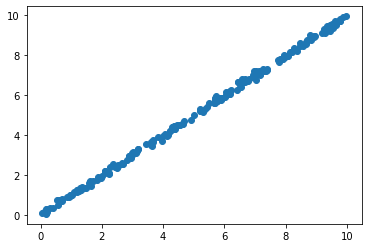

In [ ]:
np.random.seed(0)
sample_size = 200

X = np.random.uniform(0, 10, sample_size)
Y = X + 0.1*np.random.normal(0, 1, sample_size)

plt.scatter(X, Y)

X = torch.from_numpy(X).unsqueeze(1).float()
Y = torch.from_numpy(Y).unsqueeze(1).float()

In [ ]:
from torch import nn

class FNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    super(FNN, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, output_size)

  def forward(self, input):
    output = self.linear1(input)
    output = self.activation(output)
    return self.linear2(output)

In [ ]:
model = FNN(1, 1, 20)
# print(model)
# print(list(model.parameters()))

In [ ]:
from torch import optim
import torch.nn.functional as F
optimizer = optim.SGD(model.parameters(), lr = 0.01)
for iter_num in range(2000):
  optimizer.zero_grad()
  pred = model(X)
  error = nn.MSELoss(reduction='mean')(pred, Y)
  error.backward()
  optimizer.step()
  # print(f"Loss in {iter_num} step : {error.detach()}")

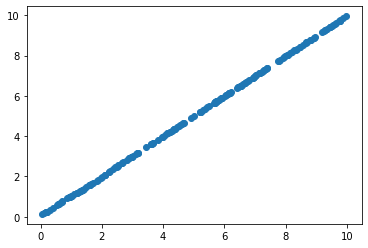

In [ ]:
plt.scatter(X.detach().numpy(), model(X).detach().numpy())

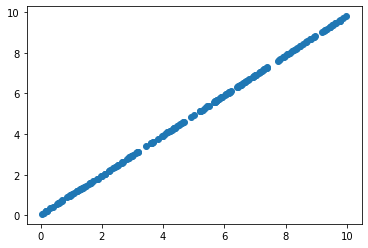

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)
model = FNN(1, 1, 20)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
for epoch in range(2000):
  for samples in dataloader:
    optimizer.zero_grad()
    X_batch, Y_batch = samples
    pred = model(X_batch)
    error = nn.MSELoss(reduction='mean')(pred, Y_batch)
    error.backward()
    optimizer.step()

plt.scatter(X.detach().numpy(), model(X).detach().numpy())

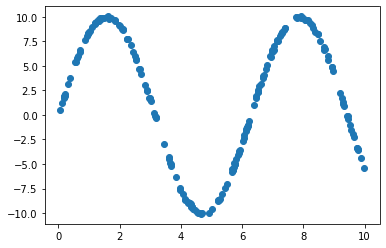

In [ ]:
np.random.seed(0)
sample_size = 200

X = np.random.uniform(0, 10, sample_size)
Y = 10*np.sin(X) + 0.1*np.random.normal(0, 1, sample_size)

plt.scatter(X, Y)

X = torch.from_numpy(X).unsqueeze(1).float()
Y = torch.from_numpy(Y).unsqueeze(1).float()

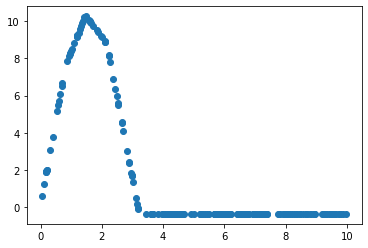

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)
model = FNN(1, 1, 20)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
for epoch in range(2000):
  for _, samples in enumerate(dataloader):
    optimizer.zero_grad()
    X_batch, Y_batch = samples
    pred = model(X_batch)
    error = nn.MSELoss(reduction='mean')(pred, Y_batch)
    error.backward()
    optimizer.step()

plt.scatter(X.detach().numpy(), model(X).detach().numpy())

In [ ]:
from torch import nn

class FNN2(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    super(FNN2, self).__init__()
    self.layer = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
    )

  def forward(self, input):
    return self.layer(input)

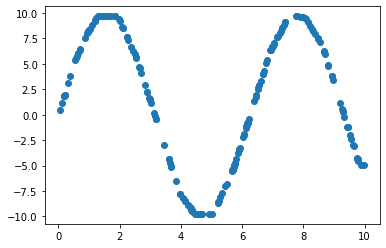

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)
model = FNN2(1, 1, 6)
optimizer = optim.RMSprop(model.parameters(), lr = 0.01)
for epoch in range(10000):
  for _, samples in enumerate(dataloader):
    optimizer.zero_grad()
    X_batch, Y_batch = samples
    pred = model(X_batch)
    error = nn.MSELoss(reduction='mean')(pred, Y_batch)
    error.backward()
    optimizer.step()

plt.scatter(X.detach().numpy(), model(X).detach().numpy())

## **3. Convolutional Neural Network (with GPU)**
Now, we train a CNN model for the MNIST classification problem.

In [ ]:
import numpy as np
import torch
from torchvision import datasets
from torchvision import transforms
from torch import nn
import matplotlib.pyplot as plt

BATCH_SIZE = 100
LEARNING_RATE = 1e-3
EPOCHS = 15

mnist_train = datasets.MNIST(root='./data', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST(root='./data', train = False, transform = transforms.ToTensor(), download = True)

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = BATCH_SIZE, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x = torch.Tensor([1.]).to(device)
x

tensor([1.], device='cuda:0')

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.fc = nn.Linear(7 * 7 * 64, 10, bias = True)
    
  def forward(self, input):
    output = self.layer1(input)
    output = self.layer2(output)
    output = output.view(output.size(0), -1) # flatten
    output = self.fc(output)
    return output

In [ ]:
model = CNN().to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
loss_ft = nn.CrossEntropyLoss().to(device)

for epoch in range(EPOCHS):
  losses = []

  for X_batch, Y_batch in data_loader:
    X_batch = X_batch.to(device)
    Y_batch = Y_batch.to(device)

    optimizer.zero_grad()
    pred = model(X_batch)
    loss = loss_ft(pred, Y_batch)
    loss.backward()
    optimizer.step()

    losses.append(loss.cpu().detach().numpy())

  print(f'Epoch {epoch+1:3d} :: Loss is {np.array(losses).mean():.6f}')


Epoch   1 :: Loss is 0.223928
Epoch   2 :: Loss is 0.062278
Epoch   3 :: Loss is 0.045591
Epoch   4 :: Loss is 0.036555
Epoch   5 :: Loss is 0.030338
Epoch   6 :: Loss is 0.026432
Epoch   7 :: Loss is 0.021643
Epoch   8 :: Loss is 0.018131
Epoch   9 :: Loss is 0.015950
Epoch  10 :: Loss is 0.013910
Epoch  11 :: Loss is 0.011092
Epoch  12 :: Loss is 0.009476
Epoch  13 :: Loss is 0.008883
Epoch  14 :: Loss is 0.007196
Epoch  15 :: Loss is 0.007287


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.986799955368042


### **References**
#### [1] A. Geron. Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow (2nd), O' Reilly (2019).
(번역본 : 핸즈온 머신러닝 2판)
#### [2] https://wikidocs.net/book/2788
